# Sequential Importance Resampling (SIR) Particle Filter vs Kalman Filer

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
t = np.arange(1001)

In [3]:
v = 300
a = 9
dt = 5
num_steps =1000
N = 500

In [4]:
A = (v*v)/a

In [5]:
omega = a/(2*v)

In [6]:
x_t = A*np.sin(omega*t*dt)

In [7]:
y_t = A*np.sin(2*omega*t*dt)

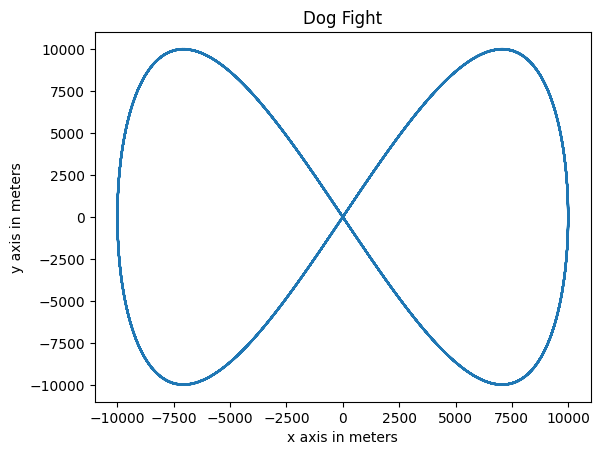

In [8]:
plt.title("Dog Fight") 
plt.xlabel("x axis in meters") 
plt.ylabel("y axis in meters") 
plt.plot(x_t,y_t) 
plt.show()

# 

In [9]:
v_x = v*np.cos(omega*t*dt)/2

In [10]:
v_y = v*np.cos(2*omega*t*dt)

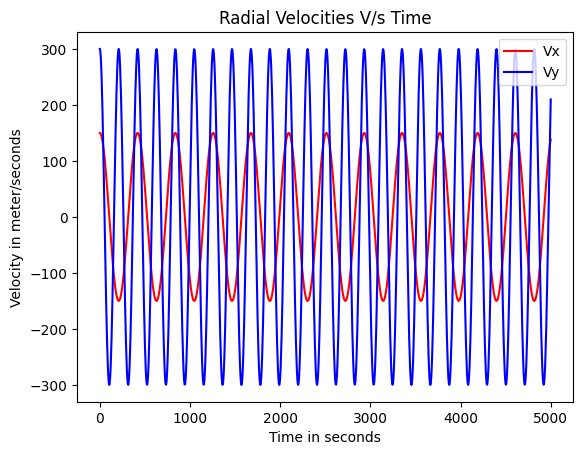

In [11]:
plt.title("Radial Velocities V/s Time")
plt.xlabel("Time in seconds")
plt.ylabel("Velocity in meter/seconds")
plt.plot(t*dt, v_x, color='r', label='Vx')
plt.plot(t*dt, v_y, color='b', label='Vy')
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

# 

In [12]:
a_x = -a*np.sin(omega*t*dt)/4

In [13]:
a_y = -a*np.sin(2*omega*t*dt)

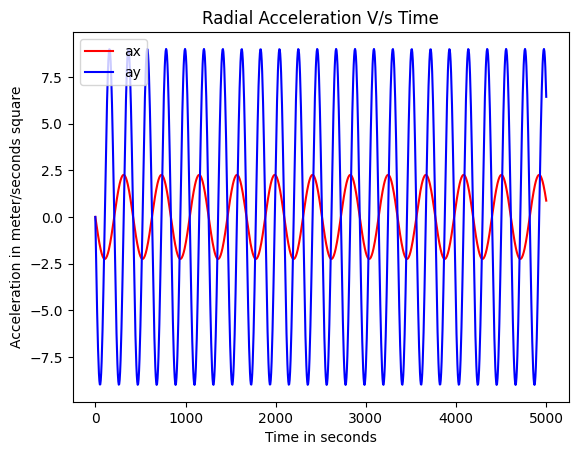

In [14]:
plt.title("Radial Acceleration V/s Time")
plt.xlabel("Time in seconds")
plt.ylabel("Acceleration in meter/seconds square")
plt.plot(t*dt, a_x, color='r', label='ax')
plt.plot(t*dt, a_y, color='b', label='ay')
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [15]:
V = np.sqrt(v_x*v_x + v_y*v_y)
V_max = np.amax(V)

In [16]:
a = np.sqrt(a_x*a_x + a_y*a_y)
A_max = np.amax(a)

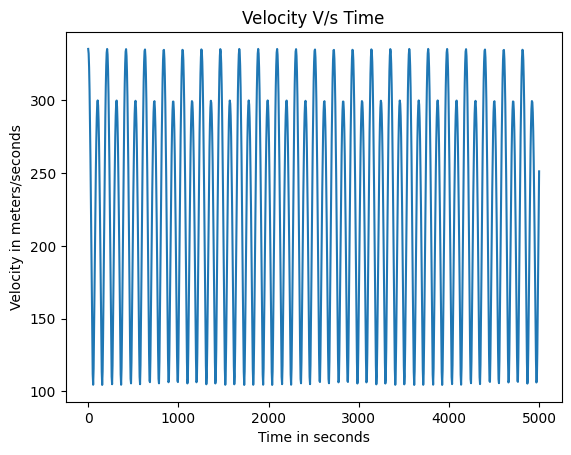

In [17]:
plt.title("Velocity V/s Time") 
plt.xlabel("Time in seconds") 
plt.ylabel("Velocity in meters/seconds") 
plt.plot(t*dt,V) 
plt.show()

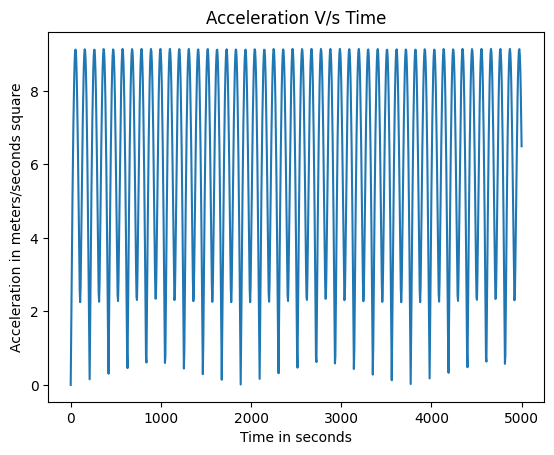

In [18]:
plt.title("Acceleration V/s Time") 
plt.xlabel("Time in seconds") 
plt.ylabel("Acceleration in meters/seconds square") 
plt.plot(t*dt,a) 
plt.show()

In [19]:
t_x = v_x/V

In [20]:
t_y = v_y/V

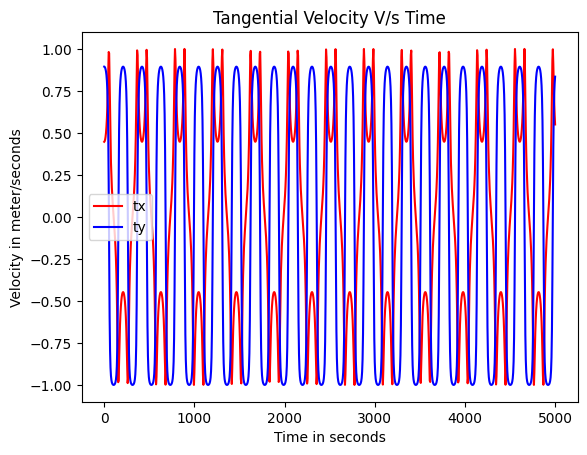

In [21]:
plt.title("Tangential Velocity V/s Time")
plt.xlabel("Time in seconds")
plt.ylabel("Velocity in meter/seconds")
plt.plot(t*dt, t_x, color='r', label='tx')
plt.plot(t*dt, t_y, color='b', label='ty')
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [22]:
n_x = -t_y

In [23]:
n_y = t_x

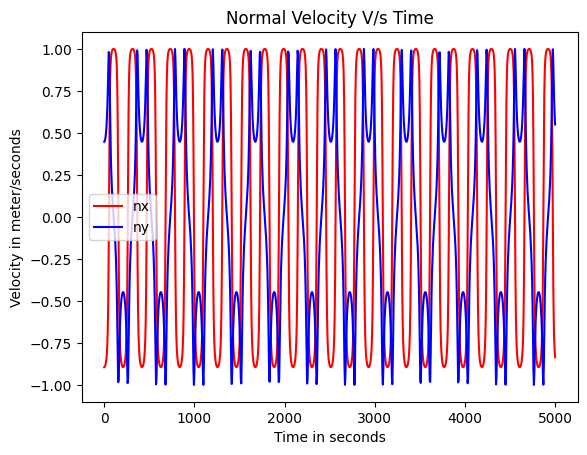

In [24]:
plt.title("Normal Velocity V/s Time")
plt.xlabel("Time in seconds")
plt.ylabel("Velocity in meter/seconds")
plt.plot(t*dt, n_x, color='r', label='nx')
plt.plot(t*dt, n_y, color='b', label='ny')
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [25]:
ta_x = a_x*t_x

In [26]:
ta_y = a_y*t_y

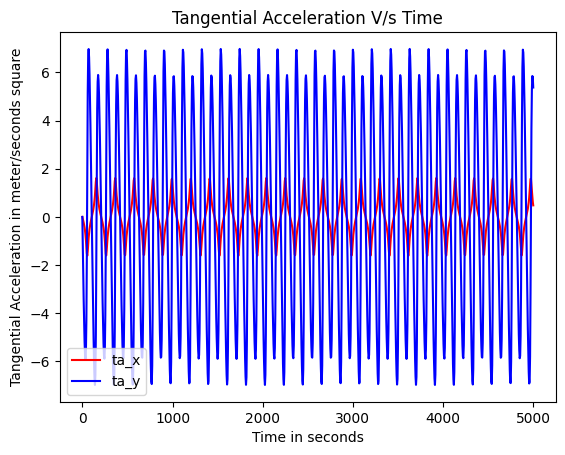

In [27]:
plt.title("Tangential Acceleration V/s Time")
plt.xlabel("Time in seconds")
plt.ylabel("Tangential Acceleration in meter/seconds square")
plt.plot(t*dt, ta_x, color='r', label='ta_x')
plt.plot(t*dt, ta_y, color='b', label='ta_y')
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [28]:
na_x = a_x*n_x

In [29]:
na_y = a_y*n_y

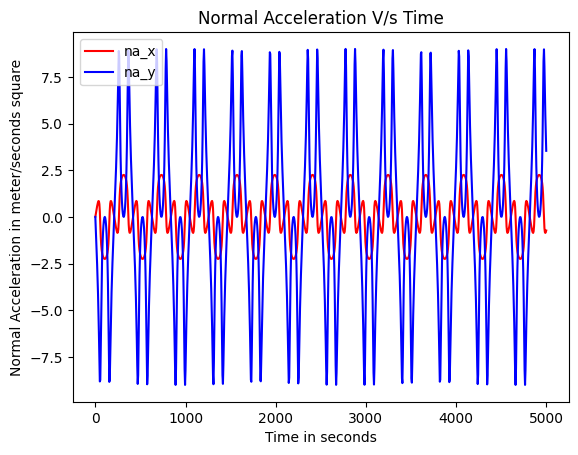

In [30]:
plt.title("Normal Acceleration V/s Time")
plt.xlabel("Time in seconds")
plt.ylabel("Normal Acceleration in meter/seconds square")
plt.plot(t*dt, na_x, color='r', label='na_x')
plt.plot(t*dt, na_y, color='b', label='na_y')
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

# 

In [31]:
F = np.array([[1, 0, dt, 0, dt**2/2, 0], 
              [0, 1, 0, dt, 0, dt**2/2], 
              [0, 0, 1, 0, dt, 0], 
              [0, 0, 0, 1, 0, dt], 
              [0, 0, 0, 0, np.exp(-dt/60), 0], 
              [0, 0, 0, 0, 0, np.exp(-dt/60)]])

In [32]:
theta = A_max*A_max * (1 - np.exp(-2*dt/60))
Q = np.array([[0.00001, 0, 0, 0, 0, 0], 
              [0, 0.00001, 0, 0, 0, 0], 
              [0, 0, 0.00001, 0, 0, 0], 
              [0, 0, 0, 0.00001, 0, 0], 
              [0, 0, 0, 0, theta, 0], 
              [0, 0, 0, 0, 0, theta]])

In [33]:
R = np.array([[2500, 0], 
              [0, 2500]])

In [34]:
H = np.array([[1, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0]])

# 

In [35]:
# Simulate Measurement
measurement_states = []
for i in range(num_steps):
    measurement_noise = np.random.multivariate_normal(mean=np.array([0, 0]), cov=R)
    new_measurement = np.array([x_t[i], y_t[i]]) + measurement_noise
    measurement_states.append(new_measurement)
measurement_states = np.array(measurement_states)
T = [i for i in range(num_steps)]

In [36]:
import Kalman as kf
import SIR_Particle as pf

In [37]:
particles, weights, mean, variance = pf.linear_gaussian_resampling_particle_filter(F, Q, H, R, measurement_states, N, num_steps)

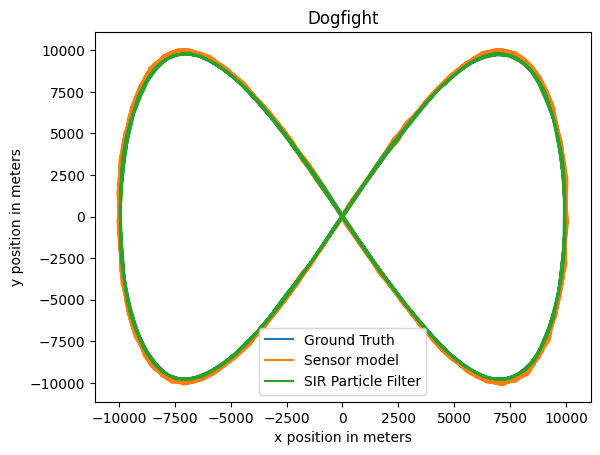

In [38]:
# Plot the x, y pos over the period
plt.plot(x_t, y_t)
plt.plot(measurement_states[:, 0], measurement_states[:, 1])
plt.plot(mean[:,0], mean[:,1])
plt.xlabel('x position in meters')
plt.ylabel('y position in meters')
plt.title('Dogfight')
plt.legend(['Ground Truth','Sensor model','SIR Particle Filter'])

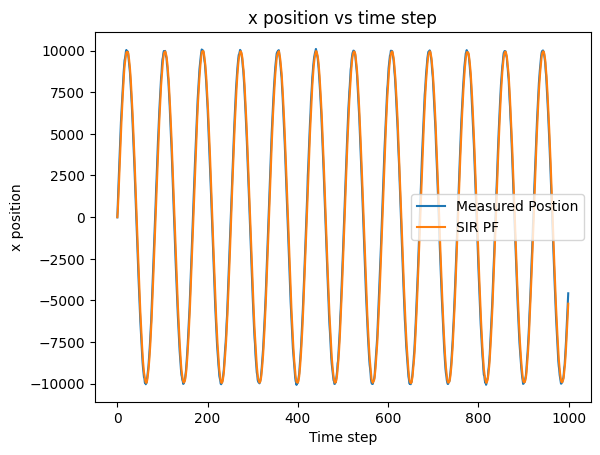

In [39]:
# Plot x position vs time
plt.plot(T, measurement_states[:, 0])
plt.plot(T, mean[:, 0])
plt.xlabel('Time step')
plt.ylabel('x position')
plt.title('x position vs time step')
plt.legend(['Measured Postion', 'SIR PF'])
#plt.savefig('car tracking2.pdf', bbox_inches='tight')



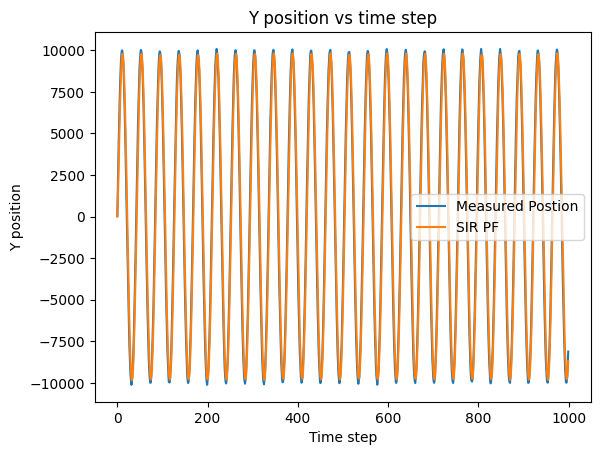

In [40]:
# Plot y position vs time
plt.plot(T, measurement_states[:, 1])
plt.plot(T, mean[:, 1])
plt.xlabel('Time step')
plt.ylabel('Y position')
plt.title('Y position vs time step')
plt.legend(['Measured Postion', 'SIR PF'])
#plt.savefig('car tracking2.pdf', bbox_inches='tight')

# Do yourself Kalman filter here